In [135]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
%matplotlib inline

# Load the data

In [136]:
iris_data = pd.read_csv('iris.data', sep=',', header=None)
column_names = ['sepal length in cm',
                'sepal width in cm',
                'petal length in cm',
                'petal width in cm',
                'class']
iris_data.columns = column_names
iris_data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data analysis

In [137]:
iris_data.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### classes distribution

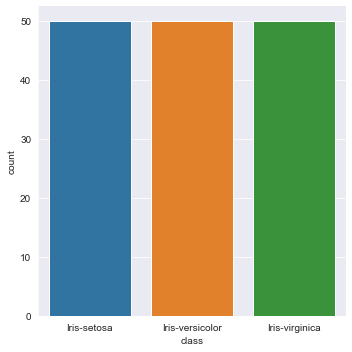

In [138]:
sns.catplot(x='class', kind='count', data=iris_data)

Count of each class is equal.

In [139]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There is zero missing values.

### Boxplots of every values considering classes

<AxesSubplot:xlabel='class', ylabel='sepal length in cm'>

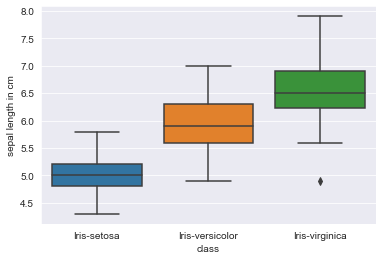

In [140]:
sns.boxplot(x='class', y='sepal length in cm', data=iris_data)

<AxesSubplot:xlabel='class', ylabel='sepal width in cm'>

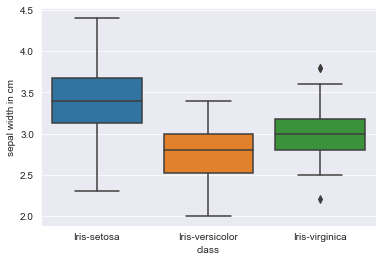

In [141]:
sns.boxplot(x='class', y='sepal width in cm', data=iris_data)

<AxesSubplot:xlabel='class', ylabel='petal length in cm'>

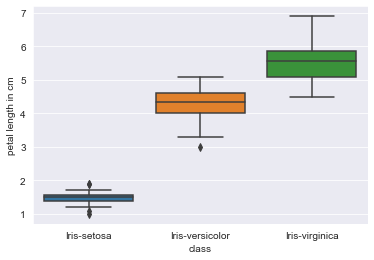

In [142]:
sns.boxplot(x='class', y='petal length in cm', data=iris_data)

<AxesSubplot:xlabel='class', ylabel='petal width in cm'>

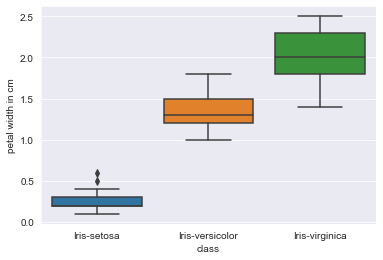

In [143]:
sns.boxplot(x='class', y='petal width in cm', data=iris_data)

In [144]:
iris_grouped = iris_data.groupby(['class'])
iris_grouped.describe()

sepal length in cm                                         \
                             count   mean       std  min    25%  50%  75%   
class                                                                       
Iris-setosa                   50.0  5.006  0.352490  4.3  4.800  5.0  5.2   
Iris-versicolor               50.0  5.936  0.516171  4.9  5.600  5.9  6.3   
Iris-virginica                50.0  6.588  0.635880  4.9  6.225  6.5  6.9   

                     sepal width in cm         ... petal length in cm       \
                 max             count   mean  ...                75%  max   
class                                          ...                           
Iris-setosa      5.8              50.0  3.418  ...              1.575  1.9   
Iris-versicolor  7.0              50.0  2.770  ...              4.600  5.1   
Iris-virginica   7.9              50.0  2.974  ...              5.875  6.9   

                petal width in cm                                            
                            count   mean       std  min  25%  50%  75%  max  
class                                                                        
Iris-setosa                  50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor              50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica               50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

We can see that classes have some outliers.
Also petal length and width is seen to have the lowest values with small range for iris setosa class.

<AxesSubplot:xlabel='petal width in cm', ylabel='Count'>

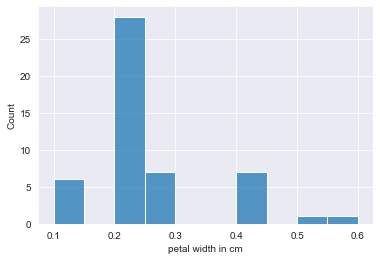

In [145]:
sns.histplot(iris_data, x=iris_grouped.get_group('Iris-setosa')['petal width in cm'])

<AxesSubplot:xlabel='petal width in cm', ylabel='Count'>

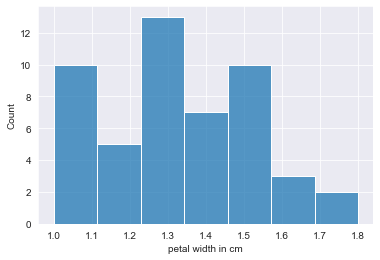

In [146]:
sns.histplot(iris_data, x=iris_grouped.get_group('Iris-versicolor')['petal width in cm'])

<AxesSubplot:xlabel='petal width in cm', ylabel='Count'>

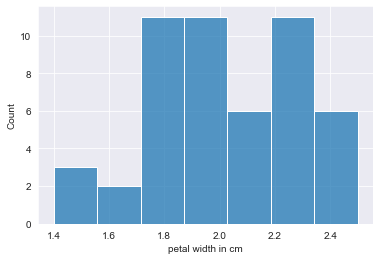

In [147]:
sns.histplot(iris_data, x=iris_grouped.get_group('Iris-virginica')['petal width in cm'])

### Correlation heatmap

<AxesSubplot:>

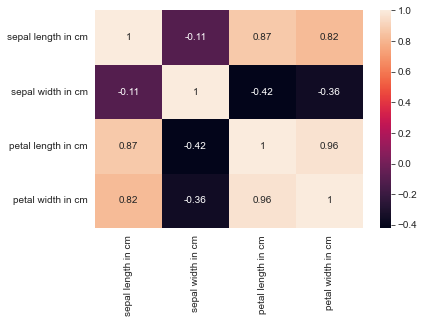

In [148]:
sns.heatmap(iris_data.corr(), annot=True)

Sepal length has strong correlation with petal length and petal width.
Petal length also has very strong correlation with petal width, which seems logical.

# Preprocessing

In [149]:
y = iris_data['class']
X = iris_data.drop('class', axis=1)

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [151]:
numerical_pipeline = Pipeline(steps=[('scale', StandardScaler())])

num_col = X.select_dtypes(include='number').columns

preprocessor = ColumnTransformer(transformers=[('numeric', numerical_pipeline, num_col)])

le = LabelEncoder()

In [152]:
X = preprocessor.fit_transform(X)
y = le.fit_transform(y)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [154]:
xgb_clas = xgb.XGBClassifier()

xgb_clas.fit(X_train, y_train)

preds = xgb_clas.predict(X_test)

In [155]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.9333333333333333